### <p>**Capstone Modul 2**</p>
## <p style="text-align:center;">**AIRBNB LISTINGS BANGKOK ANALYSIS**</p>
<hr>

### **Business Background**  :

<p>Airbnb offers a platform for property owners to rent out their accommodations to a global audience. In Bangkok, the platform is popular among tourists seeking a range of experiences from budget to luxury stays. The city's rich cultural heritage and vibrant neighborhoods attract diverse travelers, making it essential for hosts to strategically position their listings to capture demand.</p>
<hr>

### **Business Problem**  :
<p>Bangkok hosts face challenges in understanding the determinants of high booking rates and guest satisfaction. The diverse nature of the city's neighborhoods and the varying characteristics of listings make it difficult for hosts to identify which factors most effectively attract bookings and positive reviews. Additionally, hosts need to adapt to seasonal fluctuations in demand to maintain high occupancy rates year-round.</p>
<hr>

### **Problem Formulation and Objectives**  :
* Problem Formulation :
<p>Despite the success of Airbnb in Bangkok, new hosts face challenges in determining the optimal pricing, minimum nights, and room types for their listings to maximize occupancy and revenue. To help new hosts make informed decisions and succeed in a competitive market, it's essential to provide tailored recommendations based on the geographical areas within the city.</p><br>

The analysis of the Airbnb Bangkok Dataset aims to address these problems through the following questions:
1. What are the optimal pricing strategies for different room types in each geographical area (Level 1, Level 2, Level 3)?
2. What are the recommended minimum night stays for listings in different geographical areas?
3. Which room types are most in demand in each geographical area, and how can hosts leverage this information?

Key Arguments
Understanding pricing and room type preferences by area:
1. By analyzing the distribution and proportion of room types and prices in each area, we can provide recommendations on the most popular and profitable room types and pricing strategies for hosts. This will help hosts to align their offerings with market demand, thereby increasing their occupancy rates and revenues.
<br>
Optimal minimum night stays:
2. Determining the appropriate minimum night stays for different areas can help hosts balance between longer bookings and flexibility, maximizing both occupancy and revenue.

<hr>


### Dictionary Table

| **Nama Kolom** | **Deskripsi** |
|---------|---------|
| Unnamed: 0 | Index dari Dataset |
| id | unique ID dari listing |
| name  | Nama penginapan dari listing |
| host_id  | unik ID untuk host |
| host_name | Nama host/pemilik  |
| neighbourhood  | Kawasan yang ditentukan berdasarkan koordinat geografis |
| latitude | Koordinat geografis lintang dari penginapan |
| longitude | Koordinat geografis bujur dari penginapan |
| room_type  | Jenis kamar atau akomodasi yang ditawarkan |
| price | Harga harian dalam mata uang lokal (Baht) |
| minimum_nights | Jumlah minimum malam yang dibutuhkan untuk pemesanan |
| number_of_reviews  | Total jumlah ulasan yang diterima penginapan |
| last_review  | Tanggal ulasan terbaru |
| reviews_per_month | Ulasan yang diterima per bulan |
| calculated_host_listings_count  | Jumlah penawaran yang dimiliki penyewa di kota/daerah yang sama |
| availability_365  | Ketersediaan penawaran dalam 365 hari mendatang |
| number_of_reviews_ltm | Jumlah ulasan yang diterima penawaran dalam 12 bulan terakhir |


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Exploration

In [76]:
# load dataset 
df = pd.read_csv('Airbnb Listings Bangkok/Airbnb Listings Bangkok.csv')
df.head(3)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0


information about row, column, and type of dataset


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [78]:
# remove unnecessary column
df.drop(columns=['id','Unnamed: 0'], inplace=True)

In [79]:
display(df.describe(), df.describe(include='object'))

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [80]:
# unique data in each column
listitem = []
for col in df.columns:
    listitem.append([col, df[col].nunique(), df[col].unique()])
tabel_unique_data = pd.DataFrame(data=listitem, columns=['Column Name','Number of unique','Unique Sample'])
tabel_unique_data

,Column Name,Number of unique,Unique Sample
0,name,14794,"[Nice room with superb city view, Easy going l..."
1,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
2,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
3,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
4,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
5,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
6,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
7,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
8,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."
9,number_of_reviews,298,"[65, 0, 2, 19, 1, 10, 4, 27, 129, 208, 3, 78, ..."


### Missing value

In [81]:
df.isna().sum()

name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

* have 4 column with missing value, 'name', 'host_name', 'last_review' and 'reviews_per_month'.
* column 'name' and 'host_name' have small proportion, but even have small proportion data will not deleted.
* but column 'last_review' dan 'reviews_per_month' have big proportion and this column have related.

## Duplicate

In [82]:
# Based on (neighbourhood)
df_duplicate = df[df.duplicated(subset=['name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'], keep=False)]
display(len(df_duplicate))
df_duplicate.head()

758

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
288,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73616,100.57224,Entire home/apt,9999,2,46,2019-02-26,0.43,53,356,0
294,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73610,100.57040,Entire home/apt,9999,2,25,2022-12-07,0.24,53,358,2
317,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73757,100.56994,Entire home/apt,9999,2,24,2022-12-22,0.24,53,359,2
486,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73313,100.56259,Private room,4871,1,27,2022-07-11,0.28,12,364,1
551,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73665,100.56983,Entire home/apt,9999,2,19,2017-05-29,0.20,53,360,0


In [83]:
# Based on location point (longitude & latitude)
df_duplicate = df[df.duplicated(subset=['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'], keep=False)]
display(len(df_duplicate))
display(df_duplicate)

94

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
486,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,27,2022-07-11,0.28,12,364,1
1162,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.733130,100.562590,Private room,4871,1,20,2019-08-08,0.30,12,364,0
2119,"Studio with Zen garden view (30sqm), LUXX Silom",68154488,Dusadee,Bang Rak,13.726330,100.525310,Hotel room,1777,1,1,2017-03-18,0.01,62,271,0
3329,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,63,2022-01-14,0.93,13,325,1
3473,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.739370,100.555210,Entire home/apt,2470,2,71,2022-12-26,1.06,13,343,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,2 Beds Thong lor/Ekkamai/Nana/Swimming pool,485413319,Yang,Khlong Toei,13.722669,100.576863,Entire home/apt,2304,1,0,NaN,NaN,4,356,0
15806,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Kotcharat,Bang Sue,13.828505,100.527433,Entire home/apt,560,12,0,NaN,NaN,8,363,0
15818,曼谷市中心loft公寓/近BTS，毗邻曼谷河滨！美食街 帕蓬夜市14分钟可达/WIFI/游泳池免费,227771817,MeetU,Sathon,13.710777,100.519891,Entire home/apt,1532,1,0,NaN,NaN,6,344,0
15829,Family Room for 4 People,340188343,Rachan,Vadhana,13.740168,100.556320,Private room,2237,1,0,NaN,NaN,14,360,0


There are 758 properties that have duplicate data with each other based on region and other categories (columns) and 94 properties that have duplicate data with each other based on their location points and categories (columns), such as: location, property name, property owner name, price, and room type. This can confuse users and indicate that 1 property is registered with 2 different ids.

### Check Standarize

In [84]:
df['room_type'].value_counts()

room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64

### Make new column to category the neighbourhood

Here I will create a new column called *area* where this column contains a grouping of regions from the *neighborhood* column in Bangkok which consists of 50 data. I will divide it into 3 areas such as:
- Level 1 (center area).
- Level 2 (outside of Inner).
- Level 3.

With these groupings, it will be easier for me to do the analysis.

In [85]:
def kategori_area_of_district(neighbourhood):
    inner = ["Parthum Wan", "Bang Kho laen", "Yan na wa", "Wang Thong Lang", "Vadhana", "Suanluang", "Sathon", "Samphanthawong", "Ratchathewi", "Rat Burana", "Pom Prap Sattru Phai", "Phra Nakhon", "Phra Khanong", "Phaya Thai", "Khlong Toei", "Khlong San", "Huai Khwang", "Dusit", "Din Daeng", "Bang Rak", "Bang Na", "Bang Kapi"]

    intermediate = ["Thung khru", "Thon buri", "Chatu Chak", "Bang Khun thain", "Lak Si", "Taling Chan", "Saphan Sung", "Pra Wet", "Phasi Charoen", "Lat Phrao", "Khan Na Yao", "Chom Thong", "Bueng Kum", "Bangkok Noi", "Bang Sue", "Bang Phlat", "Bangkok Yai"]

    outer = ["Thawi Watthana", "Sai Mai", "Nong Khaem", "Nong Chok", "Min Buri", "Lat Krabang", "Khlong Sam Wa", "Don Mueang", "Bang Khen", "Bang Khae", "Bang Bon"]

    if neighbourhood in inner:
        return "Level 1"
    elif neighbourhood in intermediate:
        return "Level 2"
    elif neighbourhood in outer:
        return "Level 3"
    else:
        return "Unknown"

# membuat kolom baru bernama area
df['area'] = df['neighbourhood'].apply(kategori_area_of_district)

### Make new column to category the MInimum Night

In [86]:
Short_stay = 7
Medium_stay = 14
long_stay = 30


def category_minimum_night(minimum_nights):
    if minimum_nights <= Short_stay:
        return "Short-stay"
    elif minimum_nights <= Medium_stay:
        return "Medium-stay"
    elif minimum_nights <= long_stay:
        return "Long-stay"
    elif minimum_nights > long_stay:
        return "Long-stay-rent"
    else:
        return "unknow"
    
# nama kolom baru
df['stay_category'] = df['minimum_nights'].apply(category_minimum_night)

# **Data Cleanning**

### **HANDLING MISSING VALUE**
<hr>

In [87]:
df.isna().sum()/df.shape[0]*100

name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
area                               0.000000
stay_category                      0.000000
dtype: float64

If we look at the results of the missing value percentage, it can be explained that :
1. **Missing Value** in the name and host_name columns have a very small proportion, which is **below 0.06%**..
2. **Missing Value** in the last_review and reviews_per_month columns have a fairly high proportion of **above 10%**, with missing values in each column reaching 36.52%. And these two columns look interrelated, if the data in last_review is empty, then the data in reviews_per_month is also empty. And vice versa.


Fill NaN at column 'name' and 'host_name' with empty string

In [88]:
df['name'].fillna('no name',inplace=True)
df['host_name'].fillna('no host name',inplace=True)

Fill NaN at column 'last_review' with default date, and fill NaN 0 value at column 'reviews_per_month'

In [89]:
df['last_review'].fillna('1970-01-01',inplace=True)
df['reviews_per_month'].fillna(0,inplace=True)

change type of colomn 'last review' from object to date type

In [90]:
df['last_review']= pd.to_datetime(df['last_review'])

### Drop Duplicate Row

In [91]:
# number of duplicate row
len(df[df.duplicated()])

7

In [92]:
# drop duplicate row
df.drop_duplicates(inplace=True)

In [93]:
df.shape

(15847, 17)

Deleting row with price equal to 0

In [94]:
df[df['price'] == 0]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area,stay_category
11103,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,1970-01-01,0.0,1,0,0,Level 1,Short-stay


In [95]:
# delete price 0
df.drop(index=11103, inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15846 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            15846 non-null  object        
 1   host_id                         15846 non-null  int64         
 2   host_name                       15846 non-null  object        
 3   neighbourhood                   15846 non-null  object        
 4   latitude                        15846 non-null  float64       
 5   longitude                       15846 non-null  float64       
 6   room_type                       15846 non-null  object        
 7   price                           15846 non-null  int64         
 8   minimum_nights                  15846 non-null  int64         
 9   number_of_reviews               15846 non-null  int64         
 10  last_review                     15846 non-null  datetime64[ns]
 11  reviews

In [97]:
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
area                              0
stay_category                     0
dtype: int64

### Check Clean, Unique Data after data cleanning

In [98]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

describe_data = pd.DataFrame(columns=['Kolom', 'Dtypes', 'Missing Value', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
describe_data

(15846, 17)


,Kolom,Dtypes,Missing Value,unique,uniqueSample
0,name,object,0,14794,"[Le Vanvarothai(Saladaeng Residence),BTS Salad..."
1,host_id,int64,0,6658,"[106796600, 179518525]"
2,host_name,object,0,5312,"[Kanokporn, Alfred]"
3,neighbourhood,object,0,50,"[Pom Prap Sattru Phai, Chom Thong]"
4,latitude,float64,0,9606,"[13.699337005615234, 13.70844]"
5,longitude,float64,0,10224,"[100.71676, 100.38116]"
6,room_type,object,0,4,"[Entire home/apt, Shared room]"
7,price,int64,0,3039,"[11800, 1812]"
8,minimum_nights,int64,0,86,"[11, 4]"
9,number_of_reviews,int64,0,298,"[231, 49]"


Penjelasan:
- After passing the Data exploration and Data Cleaning stages, the dataset which previously had 16 columns and 15,854 rows, now has 16 columns and 15,845 rows.
- Of the total missing values, 7 rows of data were deleted and the remaining blank data was filled with relevant data..
- There is 1 anomaly data that is deleted because based on the domain knowledge, the data is considered invalid, namely data with price equal to 0.

## Statistik
<hr>

## Outlier

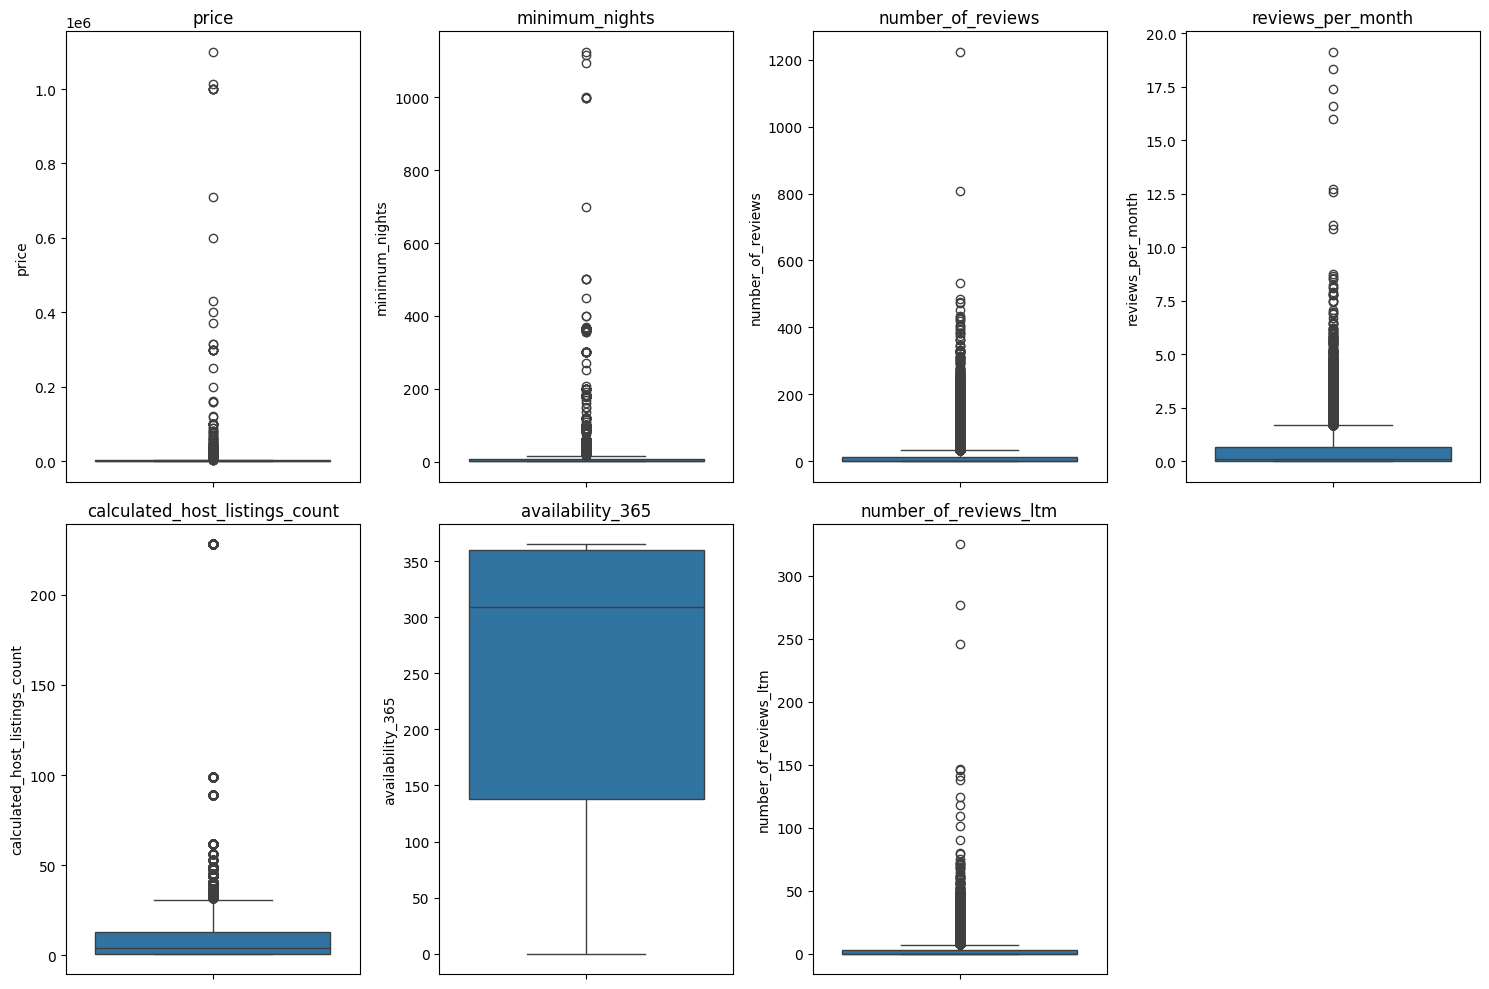

In [99]:
numericals = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numericals, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

There are outliers but the data is still important to the analyst, therefore, the data is still used and appropriate statistics are used for data with outliers. 

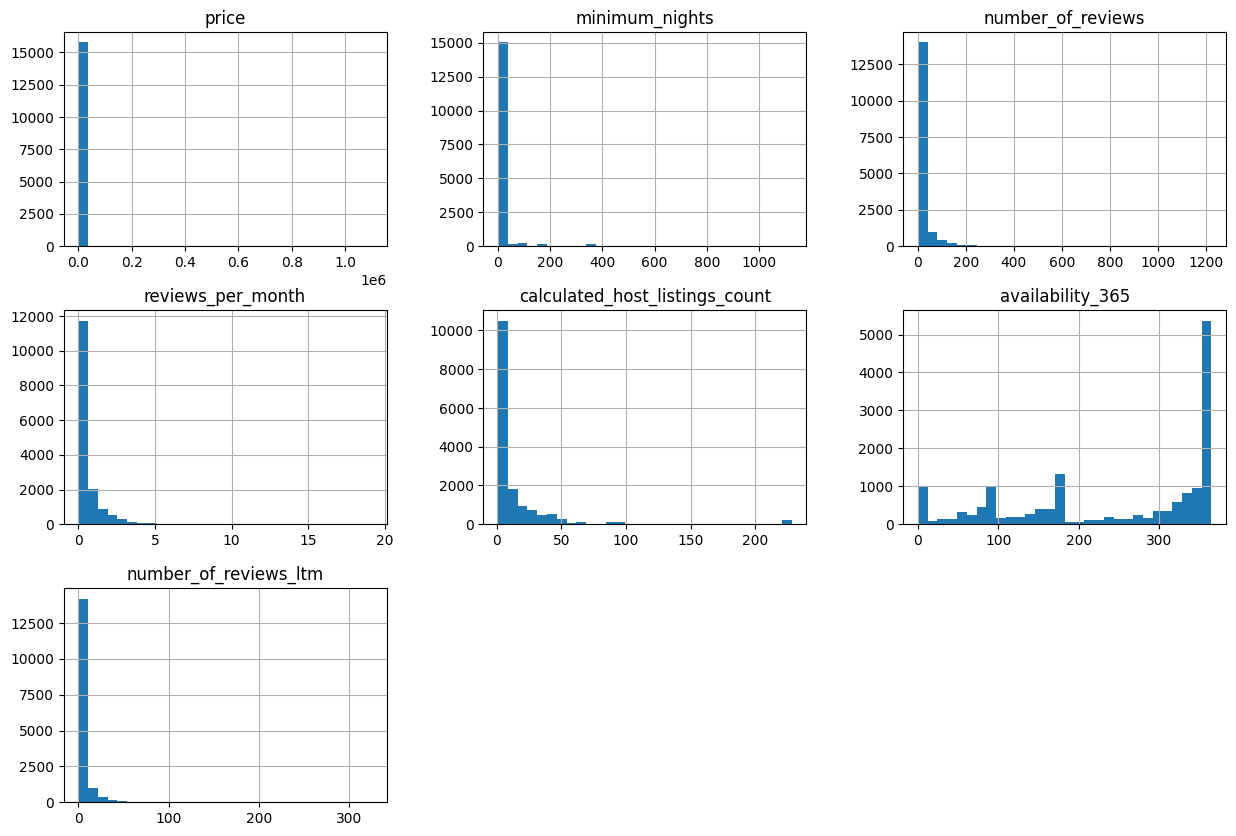

In [100]:
# Distribution plots
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].hist(figsize=(15, 10), bins=30)
plt.show()

In [101]:
from scipy.stats import shapiro

for column in ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']:
    stat, p = shapiro(df[column])
    print(f'Normalitas {column}: Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print(f'{column} berdistribusi normal (fail to reject H0)')
        print()
    else:
        print(f'{column} tidak berdistribusi normal (reject H0)')
        print()


Normalitas price: Statistics=0.044, p=0.000
price tidak berdistribusi normal (reject H0)

Normalitas minimum_nights: Statistics=0.280, p=0.000
minimum_nights tidak berdistribusi normal (reject H0)

Normalitas number_of_reviews: Statistics=0.441, p=0.000
number_of_reviews tidak berdistribusi normal (reject H0)

Normalitas reviews_per_month: Statistics=0.579, p=0.000
reviews_per_month tidak berdistribusi normal (reject H0)

Normalitas calculated_host_listings_count: Statistics=0.417, p=0.000
calculated_host_listings_count tidak berdistribusi normal (reject H0)

Normalitas availability_365: Statistics=0.832, p=0.000
availability_365 tidak berdistribusi normal (reject H0)

Normalitas number_of_reviews_ltm: Statistics=0.412, p=0.000
number_of_reviews_ltm tidak berdistribusi normal (reject H0)



C:\Users\gians\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


by using the shapiro wilk method to see the normality or not of the data, from the results of the tests carried out it was found that there was no normally distributed data. therefore, to find out the correlation of data, the spearman method was used.

**Corelation**

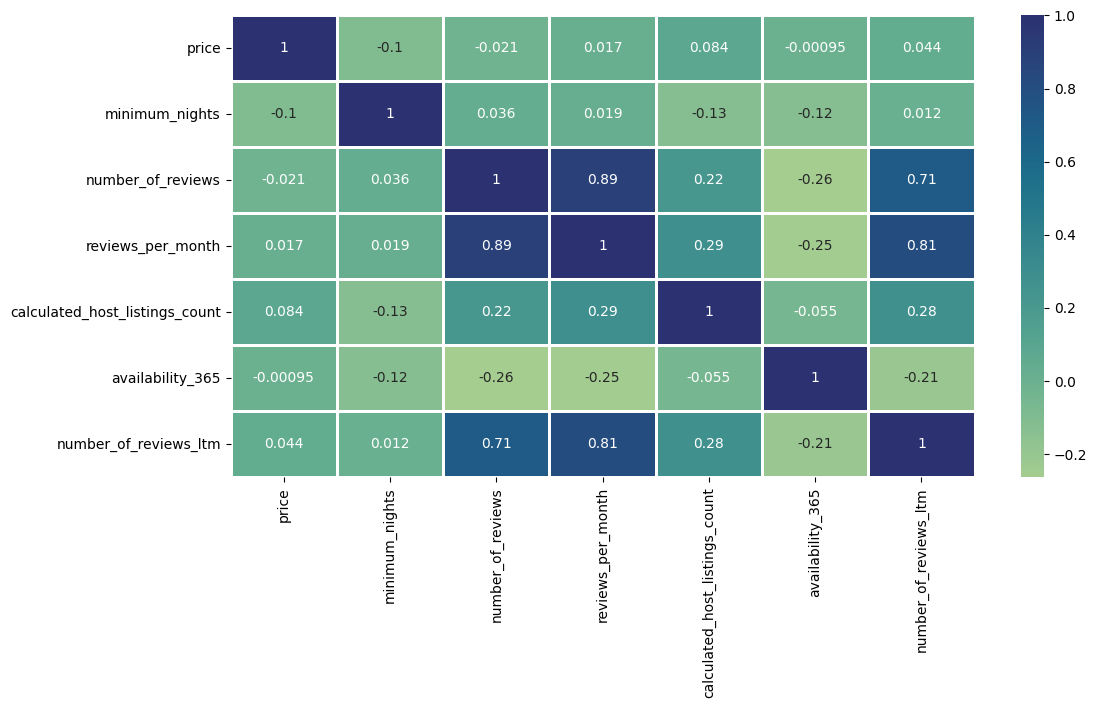

In [102]:
# Memilih kolom numerik
numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
numeric_data = df[numeric_columns]

# Menghitung matriks korelasi
corr = numeric_data.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, linewidth=2, cmap="crest")
plt.show()

### **Save Clean Data to .CSV**
<hr>

In [103]:
# df.to_csv('clean_data.csv', index=False)

# Analysis

**Neighbourhood With Number Of Review to find the Most Popular Neighbourhood**
<hr>

In [104]:
number_of_review_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().sort_values(by='number_of_reviews',ascending=False)
number_of_review_neighbourhood.head(7)

,neighbourhood,number_of_reviews
34,Pom Prap Sattru Phai,33.024390
31,Phaya Thai,32.367299
41,Sathon,27.561338
8,Bang Rak,21.347037
21,Khlong San,20.344538
29,Parthum Wan,20.006593
22,Khlong Toei,19.685742


C:\Users\gians\AppData\Local\Temp\ipykernel_4580\3196272882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=number_of_review_neighbourhood.head(7),x='neighbourhood',y='number_of_reviews',palette=colors)
C:\Users\gians\AppData\Local\Temp\ipykernel_4580\3196272882.py:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=number_of_review_neighbourhood.head(7),x='neighbourhood',y='number_of_reviews',palette=colors)


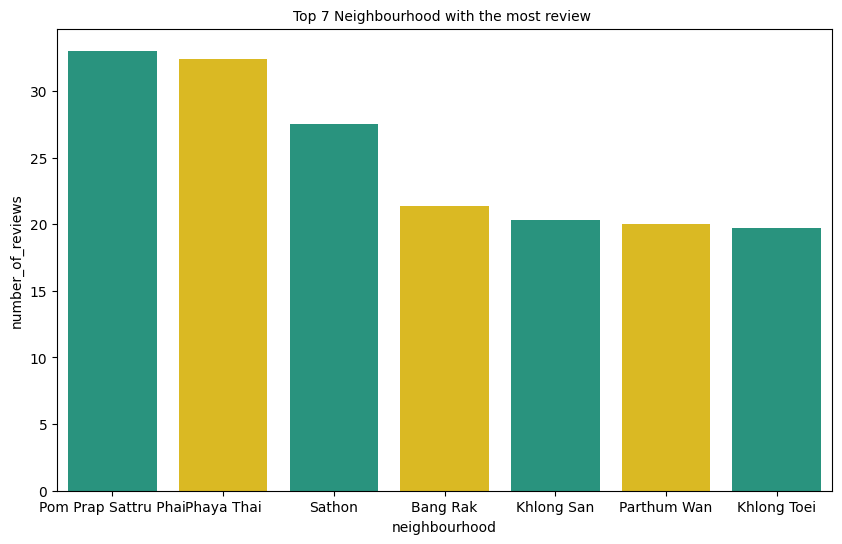

In [105]:
colors=['#17A589','#F8CC05']
plt.figure(figsize=(10,6))
plt.title('Top 7 Neighbourhood with the most review ', size=10)
sns.barplot(data=number_of_review_neighbourhood.head(7),x='neighbourhood',y='number_of_reviews',palette=colors)
plt.show()


By comparing the number_of_reviews for each neighborhood we can identify the neighborhoods that are most frequently visited and reviewed by guests. from the chart we can find out the 7 most popular neighborhoods which are Sathon Bang Rak, Khlong San, Pathum Wan, Khlong Toei, Pom Prap Sattru Phai, and Phraya Thai

In [106]:
filtered_df = df[df['neighbourhood'].isin(['Sathon Bang Rak', 'Khlong San', 'Pathum Wan', 'Khlong Toei', 'Pom Prap Sattru Phai',' Phraya Thai'])][['neighbourhood','area']]
filtered_df.groupby('area')['area'].count()

area
Level 1    2577
Name: area, dtype: int64

Neighborhood distribution in bangkok has an area where it is focused on a certain area and previously I have categorized the area into inner, intermediate, and outer. from the graph we can find out that the top 7 Neighborhoods with the most review are in the inner area. with this we can conclude neighborhoods that are most frequently visited and reviewed by guests.

**Neighbourhood With Review per month**
<hr>

In [107]:
number_of_review_per_month_neighbourhood = df.groupby('neighbourhood')['reviews_per_month'].mean().reset_index().sort_values(by='reviews_per_month',ascending=False)
number_of_review_per_month_neighbourhood.head(7)


,neighbourhood,reviews_per_month
22,Khlong Toei,0.865470
41,Sathon,0.664535
34,Pom Prap Sattru Phai,0.659675
47,Vadhana,0.644440
24,Lat Krabang,0.637181
8,Bang Rak,0.556699
31,Phaya Thai,0.551185


C:\Users\gians\AppData\Local\Temp\ipykernel_4580\420283732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=number_of_review_per_month_neighbourhood.head(7),x='neighbourhood',y='reviews_per_month',palette=colors)
C:\Users\gians\AppData\Local\Temp\ipykernel_4580\420283732.py:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=number_of_review_per_month_neighbourhood.head(7),x='neighbourhood',y='reviews_per_month',palette=colors)


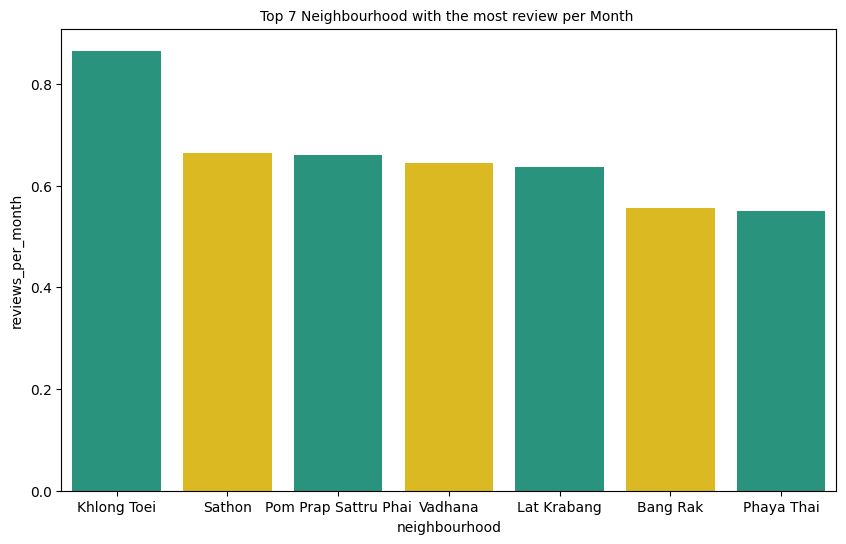

In [108]:
colors=['#17A589','#F8CC05']
plt.figure(figsize=(10,6))
plt.title('Top 7 Neighbourhood with the most review per Month ', size=10)
sns.barplot(data=number_of_review_per_month_neighbourhood.head(7),x='neighbourhood',y='reviews_per_month',palette=colors)
plt.show()


By comparing reviews per month we can know the 7 most popular neighborhoods based on The frequency of reviews per month provides insight into the popularity of the listing and how often guests stay in the area. 

In [109]:
filtered_df = df[df['neighbourhood'].isin(['Khlong Toei', 'Vadhana','Sathon','Ratchathewi','Huai Khwang','Bang Rak','Phaya Thai'])][['neighbourhood','area']]
filtered_df.groupby('area')['area'].count()

area
Level 1    8541
Name: area, dtype: int64

now we know if 7  Neighborhoods where guests most often stay. and the 7 Neighborhoods located in the inner area

**Neighbourhood With availability_365**
<hr>

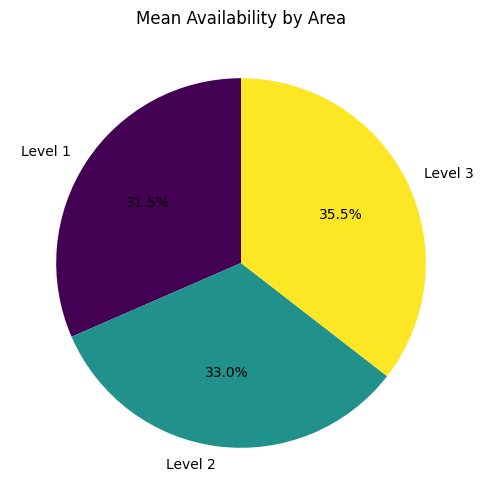

In [110]:
# Group by 'area' and calculate the average of 'availability_365'
grouped_data = df.groupby('area')['availability_365'].mean()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Mean Availability by Area')
plt.ylabel('')
plt.show()

from the pie chart we can know that the neighborhood in the inner area is the most frequently booked neighborhood.

In [111]:
# count mean price for negbourhood
avg_price_per_neighbourhood = df.groupby('area')['price'].mean().reset_index().sort_values(by='price', ascending=False)
# avg_price_per_neighbourhood

### Room Type

In [116]:

# Calculate frequency of room types for each level
room_type_counts = df.groupby(['area', 'room_type']).size().unstack(fill_value=0)

# Calculate proportions
room_type_proportions = room_type_counts.div(room_type_counts.sum(axis=1), axis=0)

print("Room Type Counts by Area Level:")
print(room_type_counts)

print("\nRoom Type Proportions by Area Level:")
print(room_type_proportions)

Room Type Counts by Area Level:
room_type  Entire home/apt  Hotel room  Private room  Shared room
area                                                             
Level 1               7542         596          4297          459
Level 2               1127          24          1065           39
Level 3                239          28           406           24

Room Type Proportions by Area Level:
room_type  Entire home/apt  Hotel room  Private room  Shared room
area                                                             
Level 1           0.584923    0.046223      0.333256     0.035598
Level 2           0.499778    0.010643      0.472284     0.017295
Level 3           0.342898    0.040172      0.582496     0.034433


In [117]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'area', 'stay_category'],
      dtype='object')

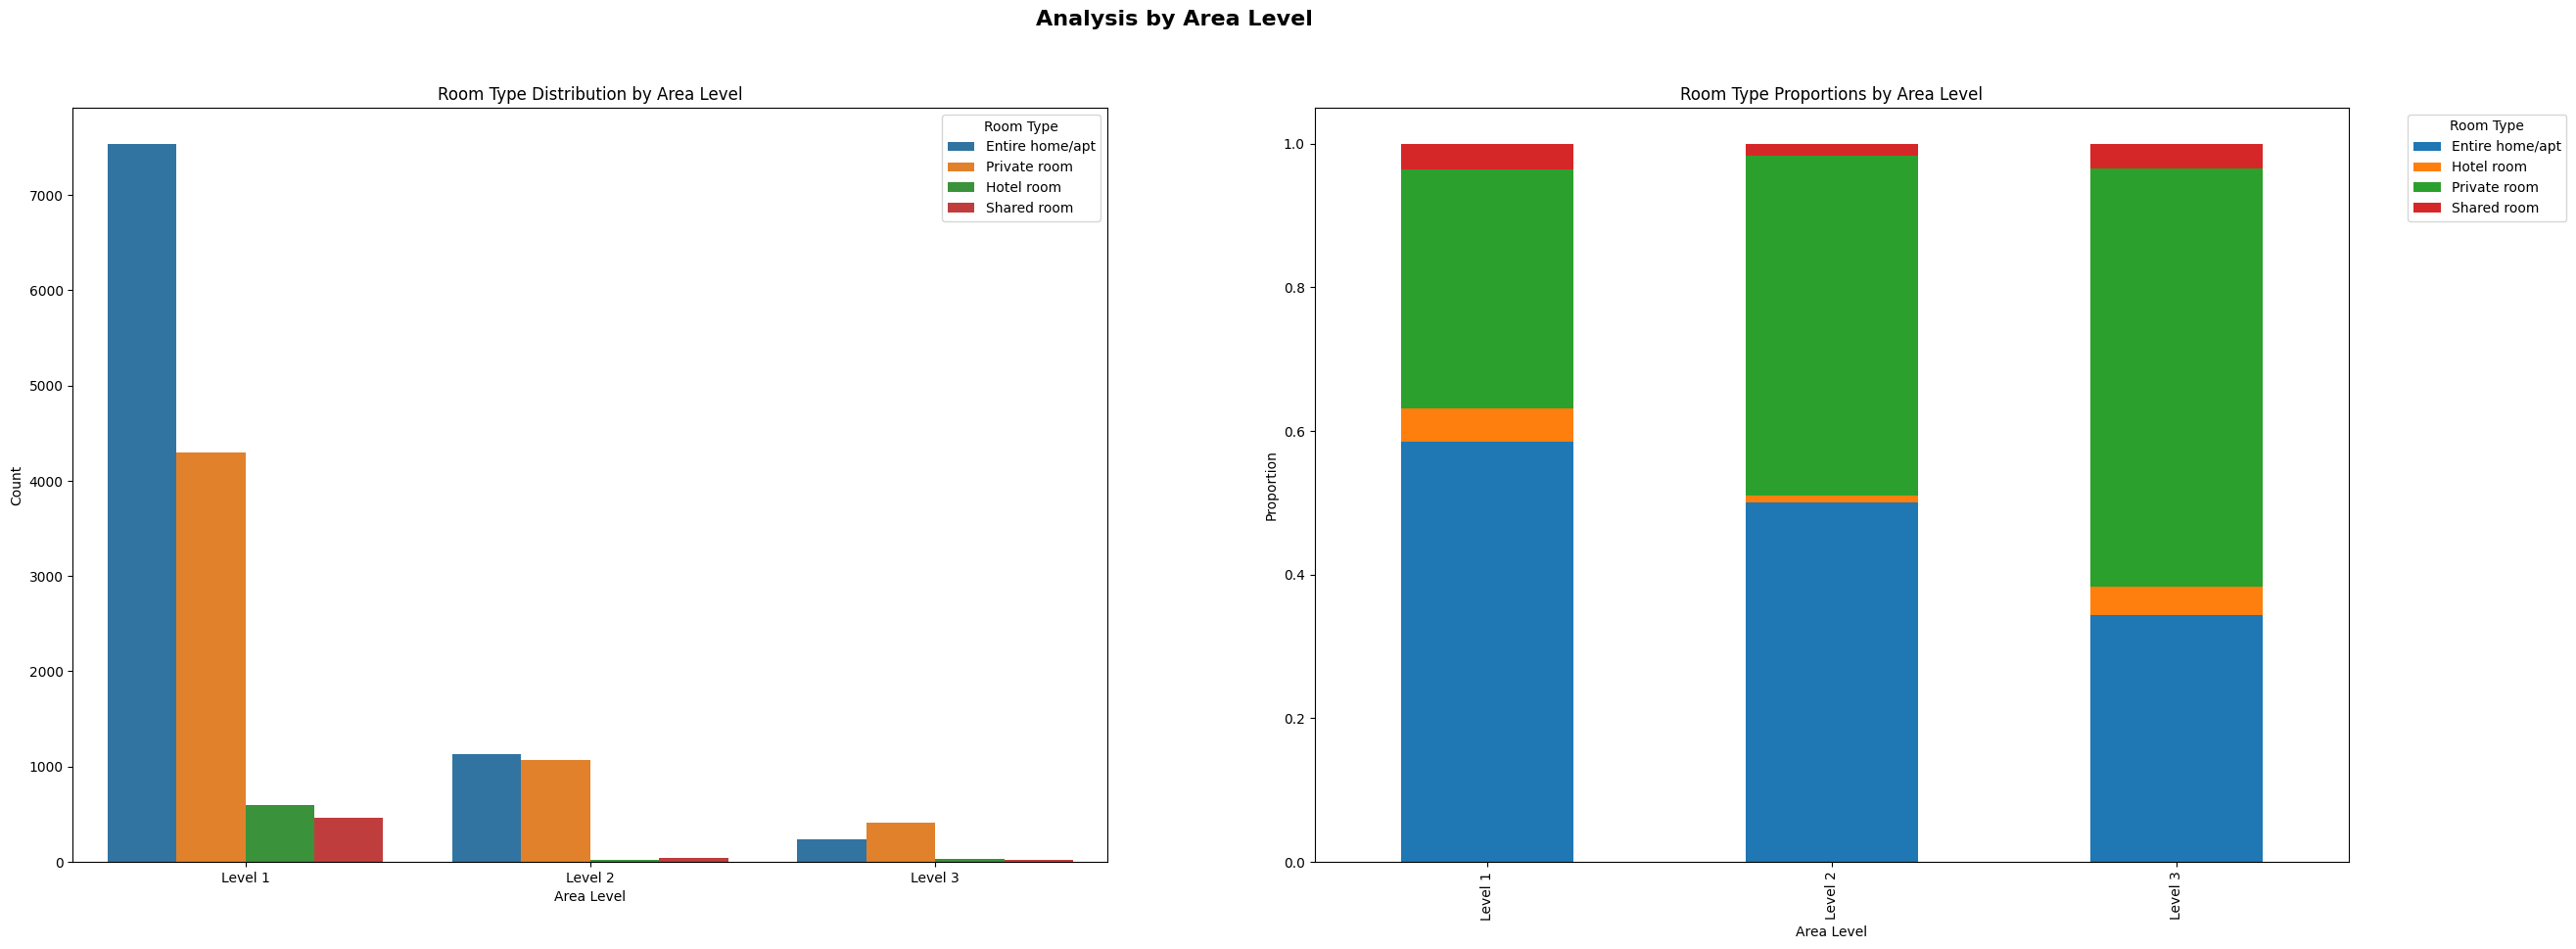

In [118]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Analysis by Area Level', size=16, fontweight='bold')

# Room Type Distribution Plot
sns.countplot(ax=axes[0], x='area', hue='room_type', data=df)
axes[0].set_title('Room Type Distribution by Area Level')
axes[0].set_xlabel('Area Level')
axes[0].set_ylabel('Count')
axes[0].legend(title='Room Type')

# Room Type Proportions Plot
room_type_proportions.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Room Type Proportions by Area Level')
axes[1].set_xlabel('Area Level')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

By getting the proportion and distribution of room types, we can now determine the room types that will be recommended for each level which are :<br>
Level 1:<br>
1. Primary Room Type: Entire home/apt
2. Secondary Room Type: Private room

Level 2:<br>
1. Primary Room Type: Entire home/apt
2. Secondary Room Type: Private room

Level 3:<br>
1. Primary Room Type: Private room
2. Secondary Room Type: Entire home/apt

### Price

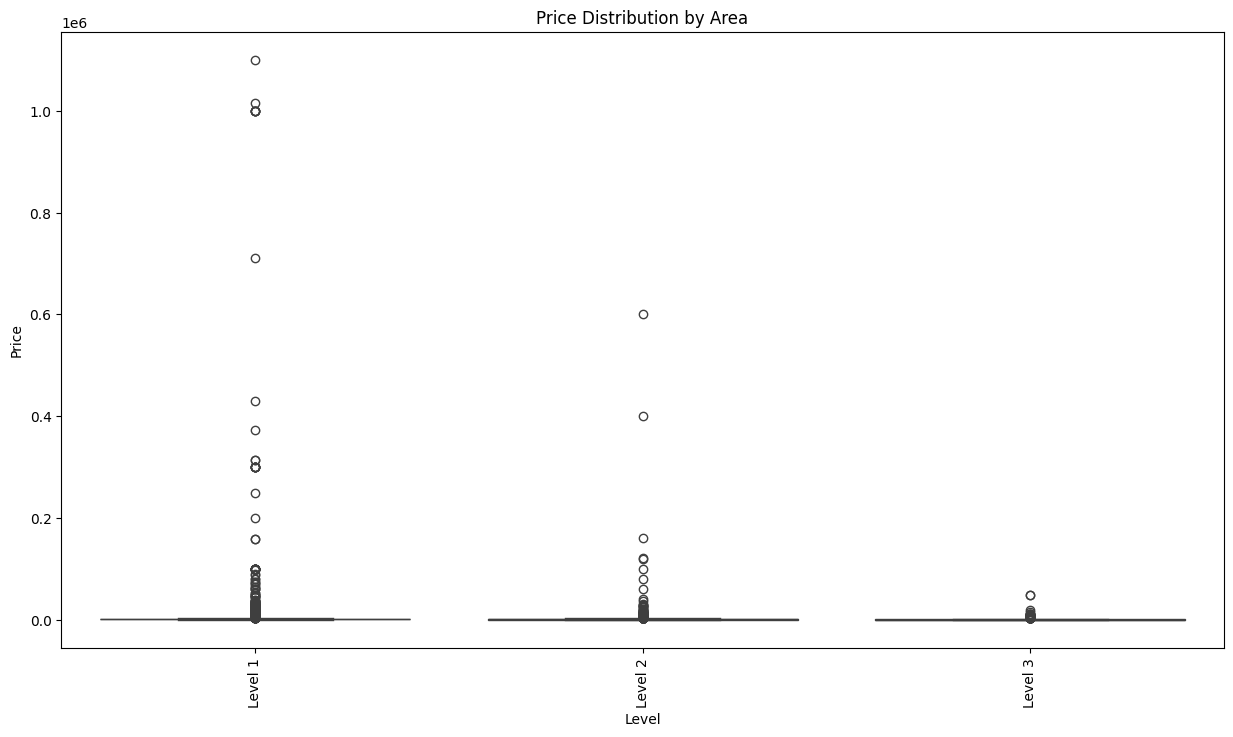

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='area', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Area')
plt.xlabel('Level')
plt.ylabel('Price')
plt.show()

1. Property prices in Level 1 and Level 2 show greater variation compared to Level 3, with some properties in Level 1 and Level 2 having very high prices as outliers.

2. Most property prices for all levels are concentrated in the lower range, although there are some properties with very high prices.

3. Areas with Level 3 seem to have more uniform property prices and tend to be lower compared to Level 1 and Level 2.

### Level 1

In [41]:
df_price_level1 = df[(df['area'] == 'Level 1') & (df['room_type'] == 'Entire home/apt')]
Q1 = df_price_level1['price'].quantile(0.25)
Q3 = df_price_level1['price'].quantile(0.75)

print('Price Recomendation For room type Entire home/apt')
print(f"Price Recomendation: Between {Q1} dan {Q3}")


Price Recomendation For room type Entire home/apt
Price Recomendation: Between 1100.0 dan 2650.0


In [42]:
df_price_level1 = df[(df['area'] == 'Level 1') & (df['room_type'] == 'Private room')] 
Q1 = df_price_level1['price'].quantile(0.25)
Q3 = df_price_level1['price'].quantile(0.75)

print('Price Recomendation For room type Private room')
print(f"Price Recomendation: Between {Q1} dan {Q3}")


Price Recomendation For room type Private room
Price Recomendation: Between 890.0 dan 2355.0


### Level 2

In [43]:
df_price_level2 = df[(df['area'] == 'Level 2') & (df['room_type'] == 'Entire home/apt')]
Q1 = df_price_level2['price'].quantile(0.25)
Q3 = df_price_level2['price'].quantile(0.75)

print('Price Recomendation For room type Entire home/apt')
print(f"Price Recomendation: Between {Q1} dan {Q3}")

Price Recomendation For room type Entire home/apt
Price Recomendation: Between 750.0 dan 1800.0


In [44]:
df_price_level2 = df[(df['area'] == 'Level 2') & (df['room_type'] == 'Private room')]
Q1 = df_price_level2['price'].quantile(0.25)
Q3 = df_price_level2['price'].quantile(0.75)

print('Price Recomendation For room type Private room')
print(f"Price Recomendation: Between {Q1} dan {Q3}")

Price Recomendation For room type Private room
Price Recomendation: Between 700.0 dan 1600.0


### Level 3

In [45]:
df_price_level2 = df[(df['area'] == 'Level 3') & (df['room_type'] == 'Private room')]
Q1 = df_price_level2['price'].quantile(0.25)
Q3 = df_price_level2['price'].quantile(0.75)

print('Price Recomendation For room type Private room')
print(f"Price Recomendation: Between {Q1} dan {Q3}")

Price Recomendation For room type Private room
Price Recomendation: Between 600.0 dan 1266.5


In [46]:
df_price_level2 = df[(df['area'] == 'Level 2') & (df['room_type'] == 'Entire home/apt')]
Q1 = df_price_level2['price'].quantile(0.25)
Q3 = df_price_level2['price'].quantile(0.75)

print('Price Recomendation For room type Entire home/apt')
print(f"Price Recomendation: Between {Q1} dan {Q3}")

Price Recomendation For room type Entire home/apt
Price Recomendation: Between 750.0 dan 1800.0


### Seasonal Analysis

In [47]:
df['last_review_(Month)'] = df['last_review'].dt.strftime('%B')
df['last_review_(Year)'] = df['last_review'].dt.year

Level 1

In [69]:
df_level1 = df[(df['area'] == 'Level 1') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_level1_ = df_level1.groupby('last_review_(Month)')['reviews_per_month'].mean().reset_index()
# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Change the month column to a category with the specified order
df_level1_['last_review_(Month)'] = pd.Categorical(df_level1_['last_review_(Month)'], categories=month_order, ordered=True)
# Sort DataFrame by month column
df_level1_ = df_level1_.sort_values(by='last_review_(Month)').reset_index(drop=True)
# df_level1_


In [70]:
df_level1_

,last_review_(Month),reviews_per_month
0,January,0.025563
1,February,0.321199
2,March,0.453787
3,April,0.249652
4,May,0.235731
5,June,0.313980
6,July,0.312243
7,August,0.350330
8,September,0.468285
9,October,0.558206


Level 2

In [71]:
df_level2 = df[(df['area'] == 'Level 2') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_level2_ = df_level2.groupby('last_review_(Month)')['reviews_per_month'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_level2_['last_review_(Month)'] = pd.Categorical(df_level2_['last_review_(Month)'], categories=month_order, ordered=True)
# Sort DataFrame by month column
df_level2_ = df_level2_.sort_values(by='last_review_(Month)').reset_index(drop=True)

In [72]:
df_level2_

,last_review_(Month),reviews_per_month
0,January,0.011612
1,February,0.220000
2,March,0.309178
3,April,0.241429
4,May,0.262308
5,June,0.275143
6,July,0.212542
7,August,0.368750
8,September,0.259200
9,October,0.348519


Level 3

In [73]:
df_level3 = df[(df['area'] == 'Level 3') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_level3_ = df_level3.groupby('last_review_(Month)')['reviews_per_month'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_level3_['last_review_(Month)'] = pd.Categorical(df_level3_['last_review_(Month)'], categories=month_order, ordered=True)
# Sort DataFrame by month column
df_level3_ = df_level3_.sort_values(by='last_review_(Month)').reset_index(drop=True)

In [74]:
df_level3_

,last_review_(Month),reviews_per_month
0,January,0.010133
1,February,0.400769
2,March,0.229643
3,April,0.134167
4,May,0.184000
5,June,0.274375
6,July,0.097000
7,August,0.135625
8,September,0.274667
9,October,0.286500


Corelation Between reviews per month and price

<Axes: >

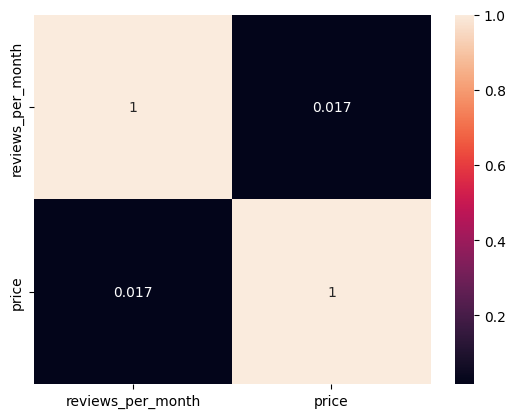

In [51]:
df_ku = df[['reviews_per_month', 'price']].corr(method='spearman')
sns.heatmap(df_ku, annot=True)

In [52]:
df_ku


,reviews_per_month,price
reviews_per_month,1.000000,0.017333
price,0.017333,1.000000


The relationship between reviews_per_month and price in your dataset is very weak and almost non-existent. This means that the variables are not linearly related, and an increase or decrease in one variable gives no meaningful indication of an increase or decrease in the other.

Grafik 

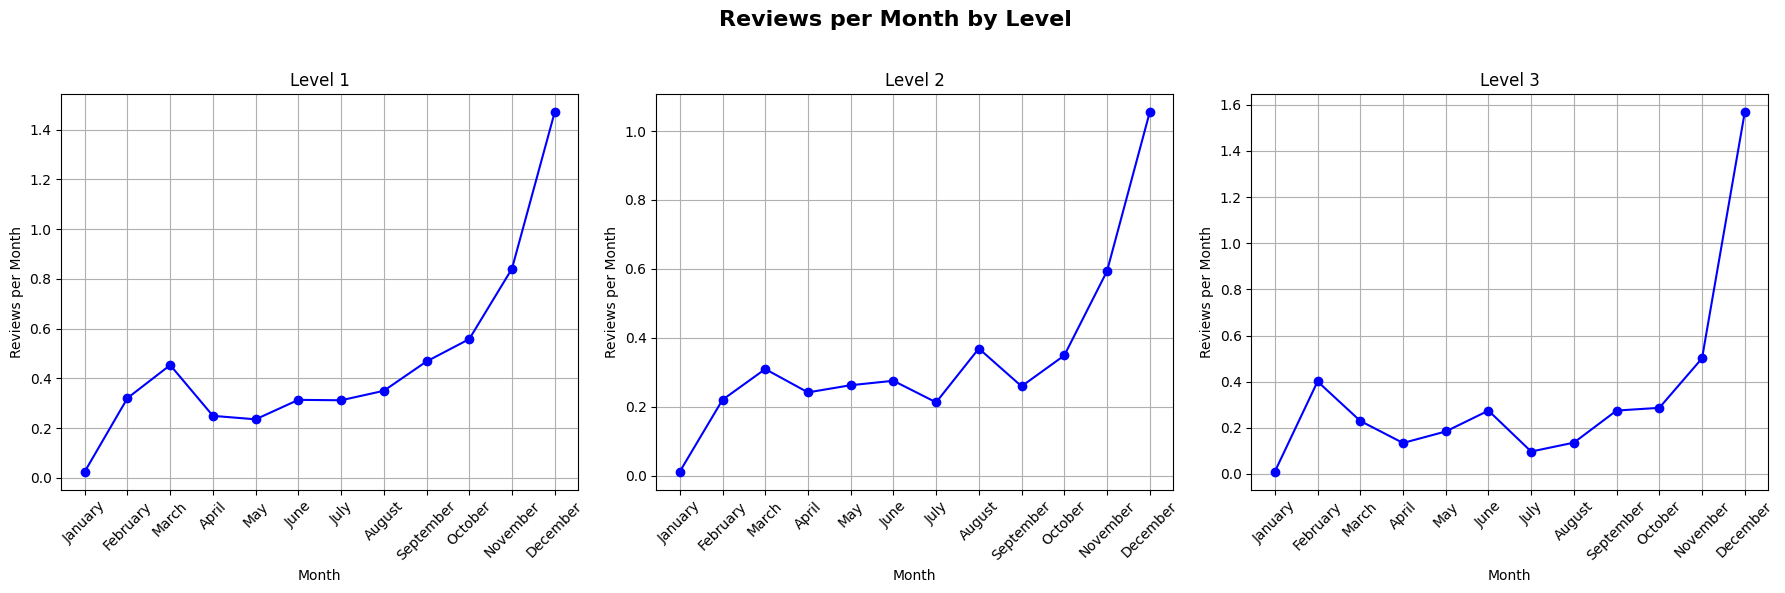

In [53]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Reviews per Month by Level', size=16, fontweight='bold')

# Plot for Level 1
axes[0].plot(df_level1_['last_review_(Month)'], df_level1_['reviews_per_month'], marker='o', linestyle='-', color='b')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Reviews per Month')
axes[0].set_title('Level 1')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot for Level 2
axes[1].plot(df_level2_['last_review_(Month)'], df_level2_['reviews_per_month'], marker='o', linestyle='-', color='b')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Reviews per Month')
axes[1].set_title('Level 2')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Plot for Level 3
axes[2].plot(df_level3_['last_review_(Month)'], df_level3_['reviews_per_month'], marker='o', linestyle='-', color='b')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Reviews per Month')
axes[2].set_title('Level 3')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

From the line graph, it can be seen that there is a seasonal trend in certain months such as December, hosts can improve quality and services adjusting prices for periods with high demand. Prices can be raised during these months to capitalize on the increased demand.



### Minimum Night

Level 1

In [54]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'area', 'stay_category', 'last_review_(Month)',
       'last_review_(Year)'],
      dtype='object')

In [56]:
df_level1 = df[(df['area'] == 'Level 1') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_stay_cate = df_level1.groupby('stay_category')['number_of_reviews'].mean().reset_index()
df_stay_cate

,stay_category,number_of_reviews
0,Long-stay,15.044328
1,Long-stay-rent,9.819383
2,Medium-stay,17.882759
3,Short-stay,19.951995


C:\Users\gians\AppData\Local\Temp\ipykernel_4580\3619032266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
C:\Users\gians\AppData\Local\Temp\ipykernel_4580\3619032266.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)


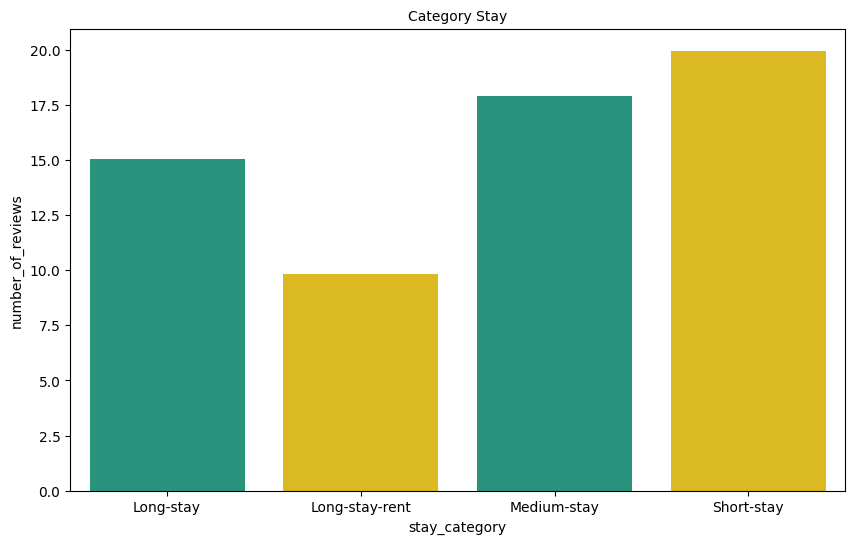

In [57]:
colors=['#17A589','#F8CC05']
plt.figure(figsize=(10,6))
plt.title('Category Stay', size=10)
sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
plt.show()


level 2

In [62]:
df_level2 = df[(df['area'] == 'Level 2') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_stay_cate = df_level2.groupby('stay_category')['number_of_reviews'].mean().reset_index()
df_stay_cate

,stay_category,number_of_reviews
0,Long-stay,11.074286
1,Long-stay-rent,5.158228
2,Medium-stay,7.153846
3,Short-stay,12.105853


C:\Users\gians\AppData\Local\Temp\ipykernel_4580\1281890793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
C:\Users\gians\AppData\Local\Temp\ipykernel_4580\1281890793.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)


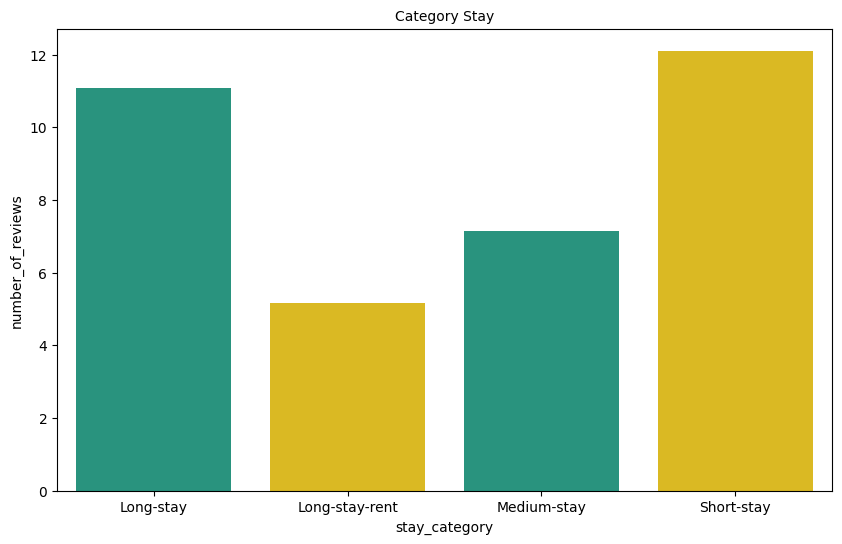

In [63]:
colors=['#17A589','#F8CC05']
plt.figure(figsize=(10,6))
plt.title('Category Stay', size=10)
sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
plt.show()

Level 3

In [64]:
df_level3 = df[(df['area'] == 'Level 3') & ((df['room_type'] == 'Entire home/apt') | (df['room_type'] == 'Private room'))]
df_stay_cate = df_level3.groupby('stay_category')['number_of_reviews'].mean().reset_index()
df_stay_cate

,stay_category,number_of_reviews
0,Long-stay,8.486486
1,Long-stay-rent,7.090909
2,Medium-stay,3.000000
3,Short-stay,8.702749


C:\Users\gians\AppData\Local\Temp\ipykernel_4580\1281890793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
C:\Users\gians\AppData\Local\Temp\ipykernel_4580\1281890793.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)


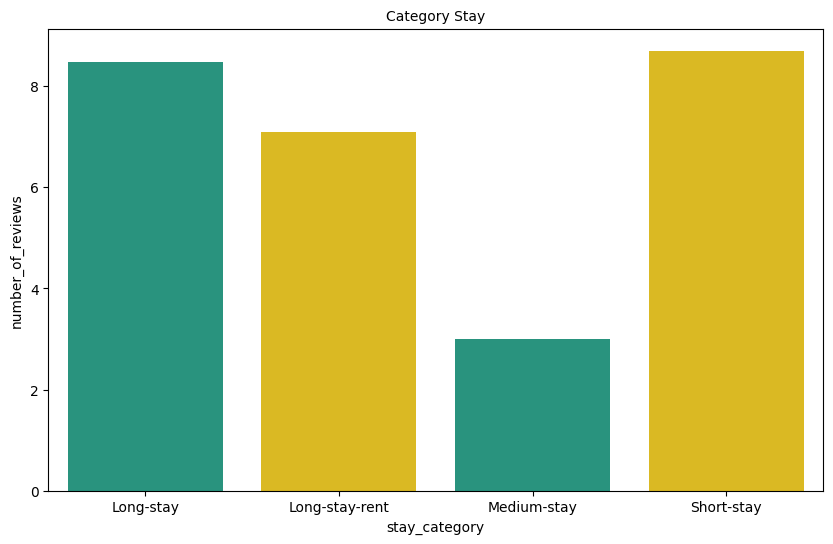

In [65]:
colors=['#17A589','#F8CC05']
plt.figure(figsize=(10,6))
plt.title('Category Stay', size=10)
sns.barplot(data=df_stay_cate,x='stay_category',y='number_of_reviews',palette=colors)
plt.show()

From the bar chart of each level, we can conclude that guests prefer to book short-stays with a range of one to seven days, followed by long-stays with a stay range of fifteen to thirty days, after which there are long-stay-rents, and medium-stays. with this the host can choose the minimum night room type.

In [66]:
df_ku = df[['number_of_reviews', 'minimum_nights']].corr(method='spearman')
df_ku

,number_of_reviews,minimum_nights
number_of_reviews,1.000000,0.036019
minimum_nights,0.036019,1.000000


The relationship between number_of_reviews and minimum_nights in dataset is very weak and almost non-existent. This means that the variables are not linearly related, and an increase or decrease in one variable gives no meaningful indication of an increase or decrease in the other.

### Conclusion

After conducting a thorough analysis of Airbnb data in Bangkok, including recommendations on pricing, room types, and the influence of reviews, here are the conclusions and recommendations that can help hosts open new listings in various areas

### Recommendations

1. **Pricing:**
   - Hosts should set prices within the recommended ranges based on area and room type to ensure competitive pricing that can attract guests.
   - Consider increasing prices during December and other high-review months to capitalize on increased demand.

2. **Room Type Selection:**
   - In Level 1 and Level 2, focus on providing Entire home/apt as the first choice and Private room as the second choice.
   - At Level 3, focus on providing Private rooms as the first choice and Entire home/apt as the second choice.

3. **Minimum Night Stays Strategy:**
   - **Level 1:** Prioritize Short-stays (≤7 nights). Alternative: Long-stays (15-30 nights).
   - **Level 2:** Prioritize Short-stays (≤7 nights). Alternative: Long-stays (15-30 nights).
   - **Level 3:** Prioritize Short-stays (≤7 nights). Alternative: Long-stays (15-30 nights).

4. **Review Quality Improvement:**
   - Ensure that the listing is always in the best condition and provides a satisfying experience for guests to increase the number and quality of reviews.
   - Hosts can use reviews as a tool to customize and improve their services on an ongoing basis.


In [ ]:
###